In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import wrangle

In [6]:
df = pd.read_csv("clean_zillow.csv")

In [7]:
df.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error,acres,square_feet_bins,lot_sqft_bins,acre_bins
0,10711855,261.0,1,2.0,3.0,8.0,2107.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.487096,L2,0.210239,5,0,0
1,10711877,261.0,1,2.0,4.0,8.0,1882.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.241668,L4,0.207415,4,0,0
2,10711888,261.0,1,2.0,4.0,8.0,1882.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.358231,L5,0.224977,4,0,0
3,10711910,261.0,1,2.0,3.0,8.0,1477.0,6037.0,0.0,2.0,...,1,0,0,61.0,69.891443,L1,0.259068,3,1,0
4,10711923,261.0,1,2.0,4.0,8.0,1918.0,6037.0,0.0,2.0,...,1,0,0,61.0,79.288338,L2,0.258012,4,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51207 entries, 0 to 51206
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             51207 non-null  int64  
 1   land_type            51207 non-null  float64
 2   has_heating_system   51207 non-null  int64  
 3   bathrooms            51207 non-null  float64
 4   bedrooms             51207 non-null  float64
 5   quality              51207 non-null  float64
 6   square_feet          51207 non-null  float64
 7   fips                 51207 non-null  float64
 8   has_fireplace        51207 non-null  float64
 9   full_bathrooms       51207 non-null  float64
 10  latitude             51207 non-null  float64
 11  longitude            51207 non-null  float64
 12  lot_square_feet      51207 non-null  float64
 13  has_pool             51207 non-null  float64
 14  city                 51207 non-null  float64
 15  county               51207 non-null 

In [9]:
train, validate, test = wrangle.split_zillow(df)

In [10]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error,acres,square_feet_bins,lot_sqft_bins,acre_bins
14991,11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,...,1,0,0,80.0,81.480056,L5,0.151538,4,0,0
19544,12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,...,1,0,0,46.0,83.868458,L3,0.301354,5,1,0
681,10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,...,1,0,0,61.0,77.918010,L3,0.219972,5,0,0
3514,10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,...,1,0,0,73.0,82.224030,L4,0.153329,4,0,0
34566,13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,...,0,1,0,16.0,73.929172,L2,0.104913,6,0,0


In [11]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [12]:
X_train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error,acres,square_feet_bins,lot_sqft_bins,acre_bins
14991,11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,...,1,0,0,80.0,81.480056,L5,0.151538,4,0,0
19544,12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,...,1,0,0,46.0,83.868458,L3,0.301354,5,1,0
681,10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,...,1,0,0,61.0,77.918010,L3,0.219972,5,0,0
3514,10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,...,1,0,0,73.0,82.224030,L4,0.153329,4,0,0
34566,13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,...,0,1,0,16.0,73.929172,L2,0.104913,6,0,0


In [13]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [14]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error,acres,square_feet_bins,lot_sqft_bins,acre_bins
14991,11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,...,1,0,0,80.0,81.480056,L5,0.151538,4,0,0
19544,12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,...,1,0,0,46.0,83.868458,L3,0.301354,5,1,0
681,10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,...,1,0,0,61.0,77.918010,L3,0.219972,5,0,0
3514,10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,...,1,0,0,73.0,82.224030,L4,0.153329,4,0,0
34566,13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,...,0,1,0,16.0,73.929172,L2,0.104913,6,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51207 entries, 0 to 51206
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             51207 non-null  int64  
 1   land_type            51207 non-null  float64
 2   has_heating_system   51207 non-null  int64  
 3   bathrooms            51207 non-null  float64
 4   bedrooms             51207 non-null  float64
 5   quality              51207 non-null  float64
 6   square_feet          51207 non-null  float64
 7   fips                 51207 non-null  float64
 8   has_fireplace        51207 non-null  float64
 9   full_bathrooms       51207 non-null  float64
 10  latitude             51207 non-null  float64
 11  longitude            51207 non-null  float64
 12  lot_square_feet      51207 non-null  float64
 13  has_pool             51207 non-null  float64
 14  city                 51207 non-null  float64
 15  county               51207 non-null 

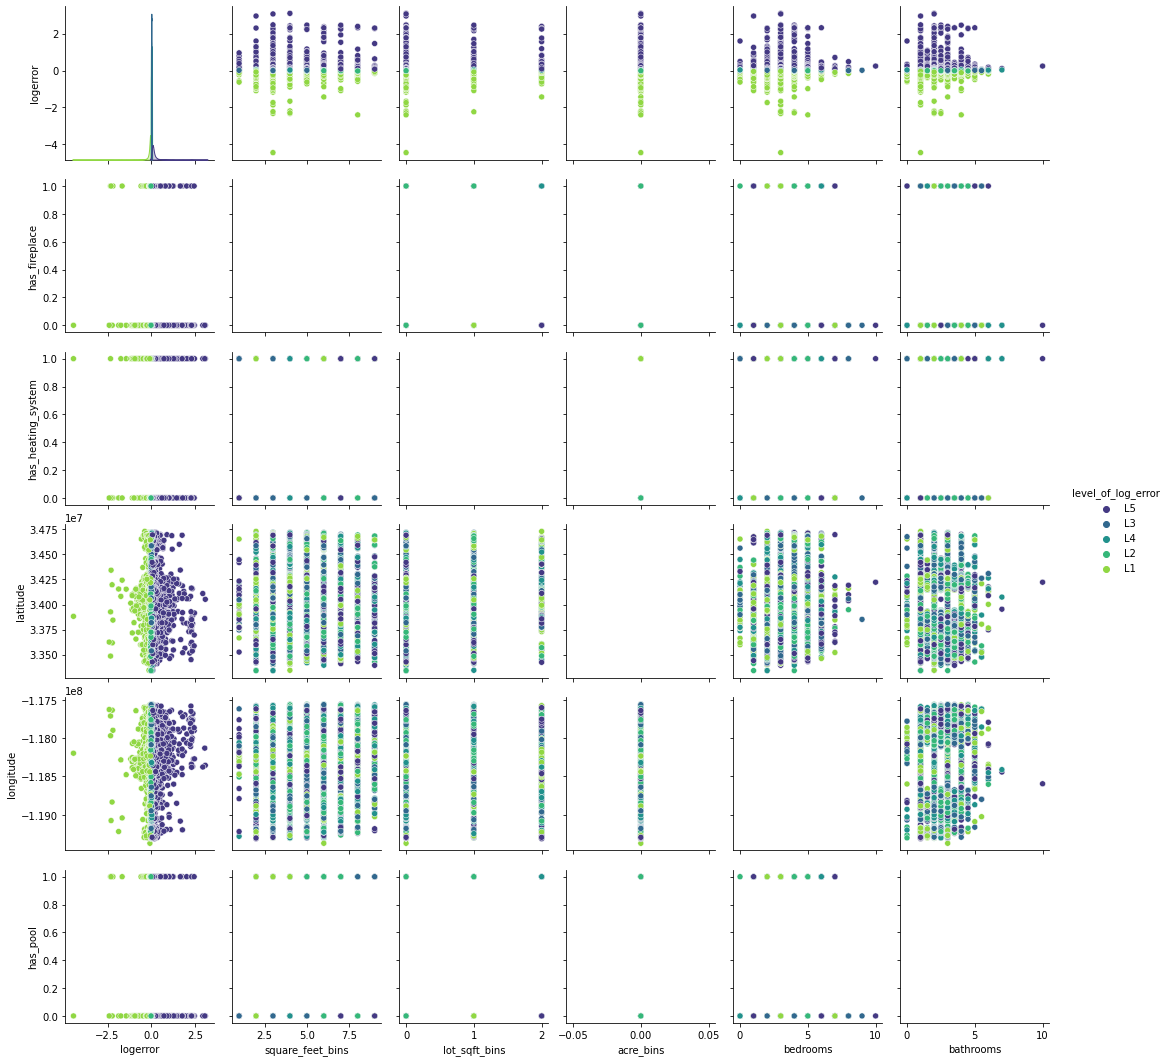

In [16]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 'acre_bins', 
                       'bedrooms', 'bathrooms'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 'latitude', 
                       'longitude', 'has_pool'], palette='viridis')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51207 entries, 0 to 51206
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             51207 non-null  int64  
 1   land_type            51207 non-null  float64
 2   has_heating_system   51207 non-null  int64  
 3   bathrooms            51207 non-null  float64
 4   bedrooms             51207 non-null  float64
 5   quality              51207 non-null  float64
 6   square_feet          51207 non-null  float64
 7   fips                 51207 non-null  float64
 8   has_fireplace        51207 non-null  float64
 9   full_bathrooms       51207 non-null  float64
 10  latitude             51207 non-null  float64
 11  longitude            51207 non-null  float64
 12  lot_square_feet      51207 non-null  float64
 13  has_pool             51207 non-null  float64
 14  city                 51207 non-null  float64
 15  county               51207 non-null 

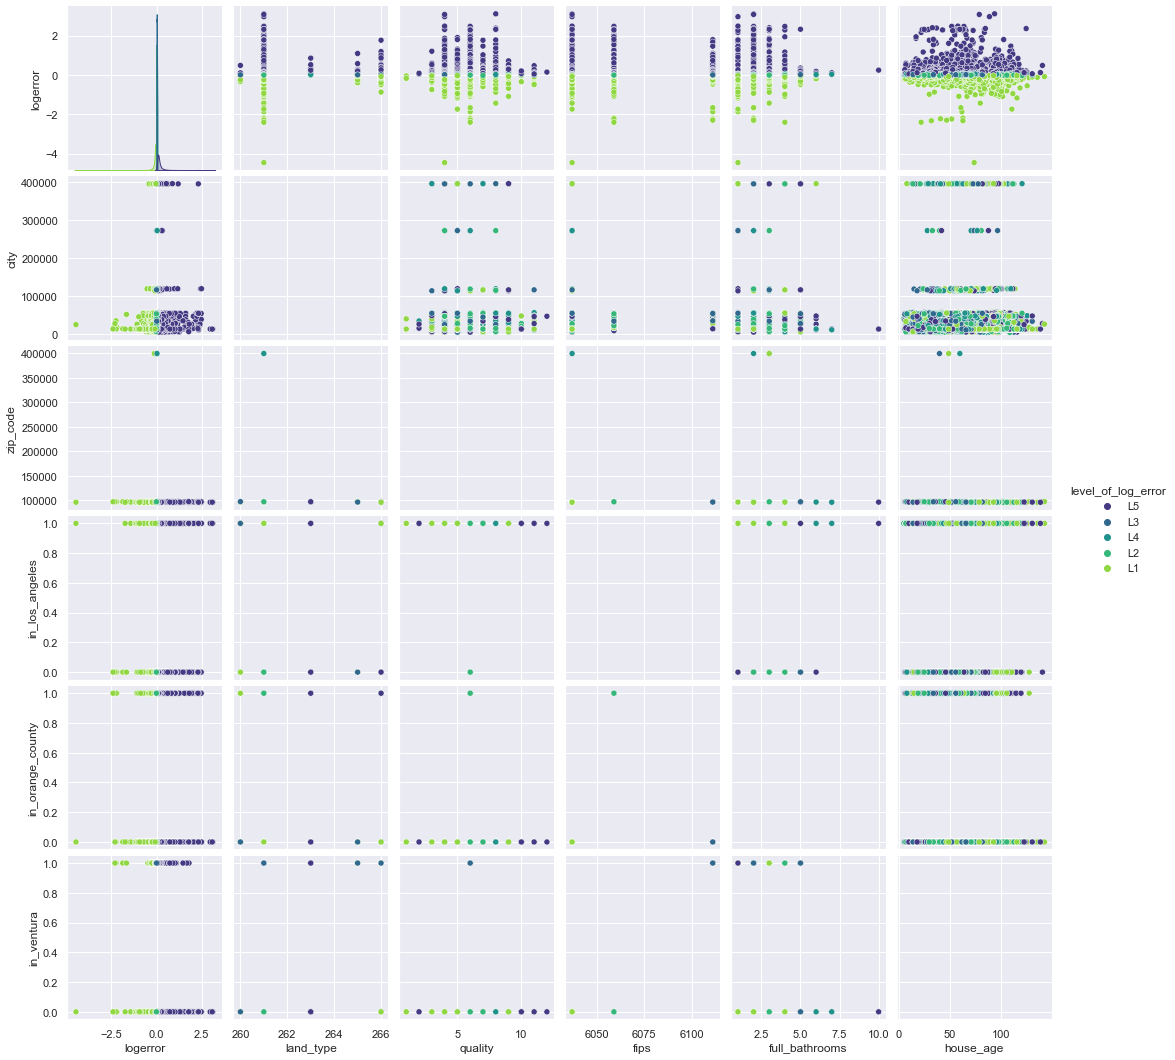

In [20]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'land_type', 'quality', 'fips', 
                       'full_bathrooms', 'house_age'],
             y_vars = ['logerror', 'city', 'zip_code', 'in_los_angeles', 
                       'in_orange_county', 'in_ventura'], palette='viridis')

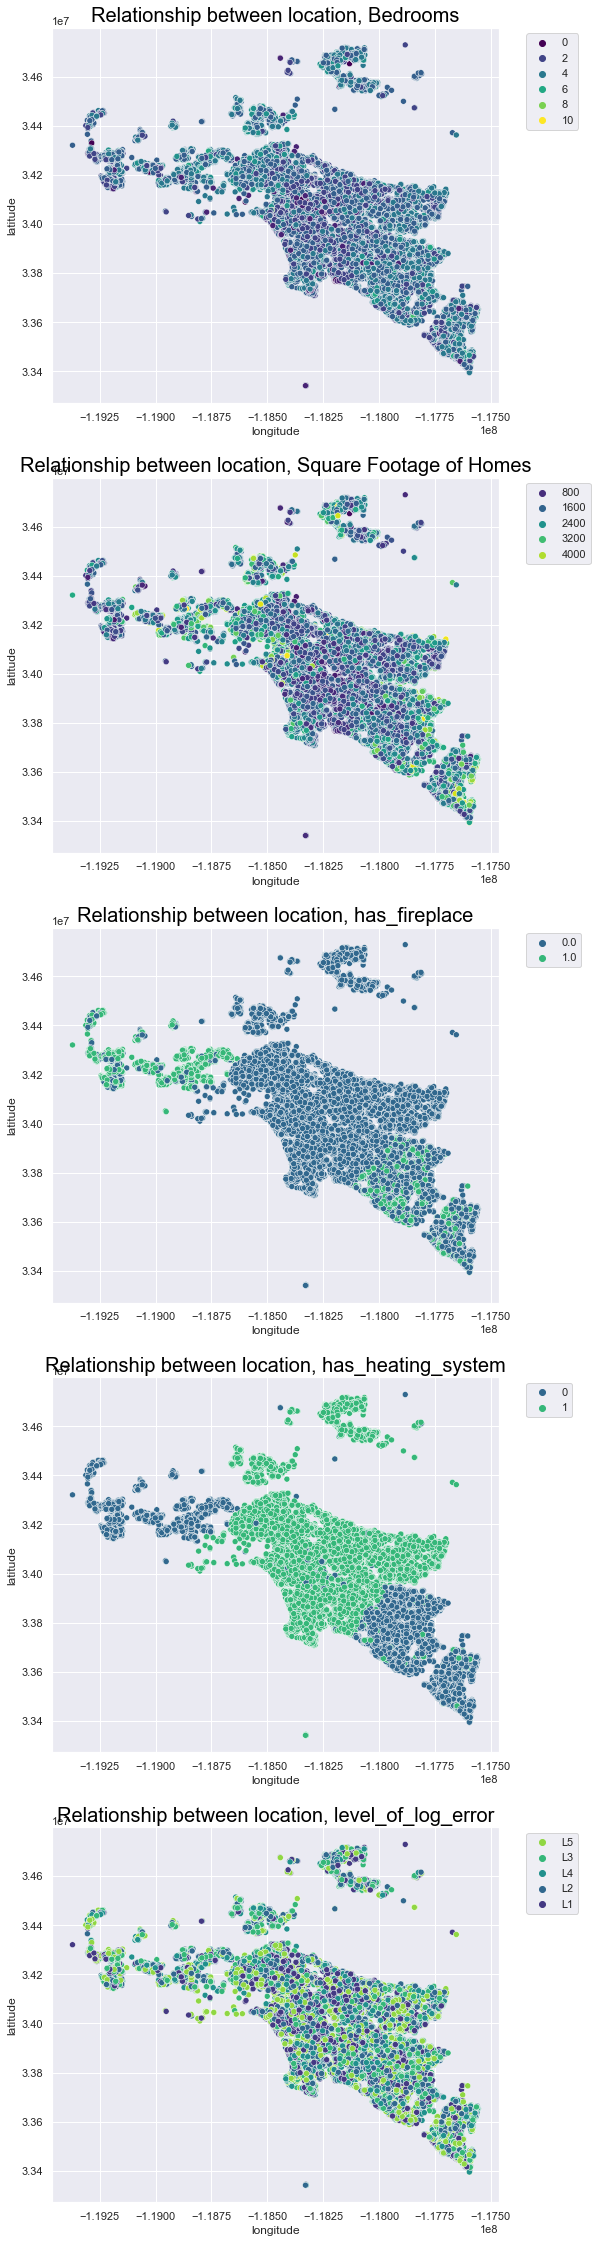

In [61]:
plt.subplots(5, 1, figsize=(8,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.bedrooms, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='square_feet', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_fireplace, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_heating_system, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='level_of_log_error', palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
plt.subplots(5, 1, figsize=(12,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='fips', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.violinplot(y='in_orange_county', x='level_of_log_error', hue='has_heating_system', data=train,
               inner="quart", linewidth=1, 
               palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='fips', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='fips', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='fips', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

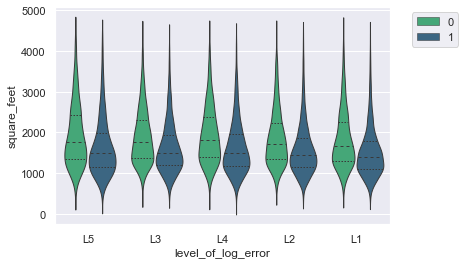

In [51]:
sns.violinplot(y='square_feet', x='level_of_log_error', hue='in_los_angeles', data=train,
               inner="quart", linewidth=1, 
               palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<AxesSubplot:xlabel='land_tax_value', ylabel='logerror'>

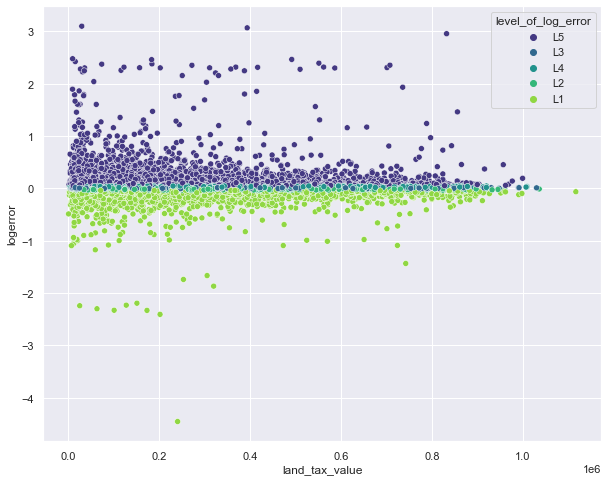

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = train.land_tax_value, y = train.logerror, hue = train.level_of_log_error, palette='viridis')

In [82]:
df[df.columns[1:]].corr()['logerror'][:]

land_type             -0.005588
has_heating_system    -0.021841
bathrooms              0.024887
bedrooms               0.028124
quality               -0.009871
square_feet            0.027943
fips                   0.005931
has_fireplace         -0.004150
full_bathrooms         0.023309
latitude              -0.019967
longitude              0.019943
lot_square_feet        0.009850
has_pool              -0.004150
city                   0.006397
county                -0.021990
zip_code               0.000868
room_count             0.012874
unitcnt                     NaN
structure_tax_value   -0.007103
tax_value             -0.016823
land_tax_value        -0.018471
taxamount             -0.017687
logerror               1.000000
in_los_angeles        -0.018956
in_orange_county       0.023780
in_ventura            -0.004595
house_age             -0.007046
tax_rate              -0.010517
acres                  0.009850
square_feet_bins       0.027148
lot_sqft_bins          0.010245
acre_bin

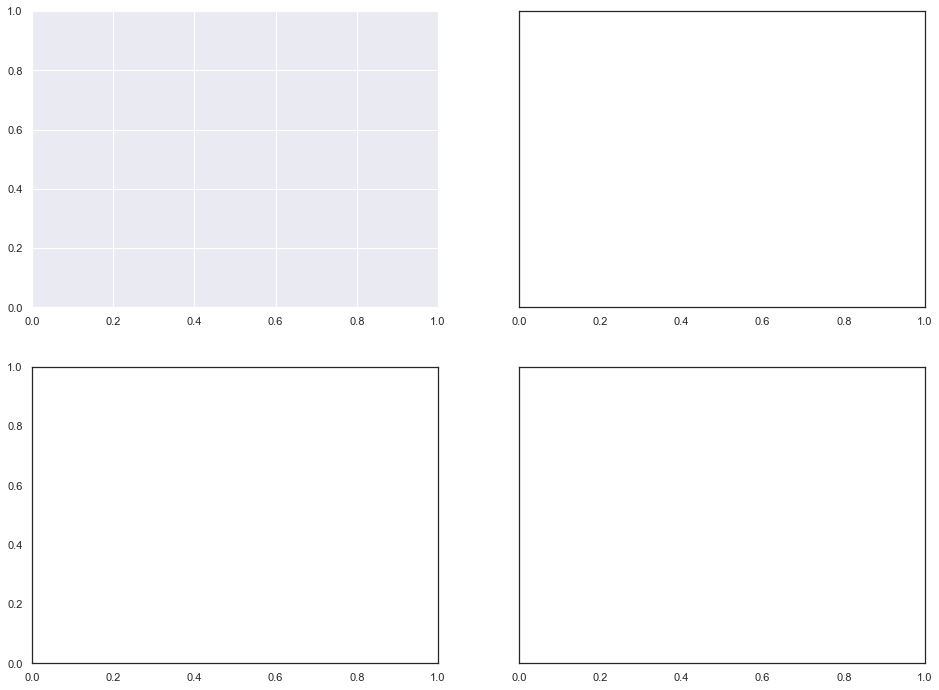

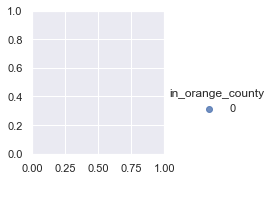

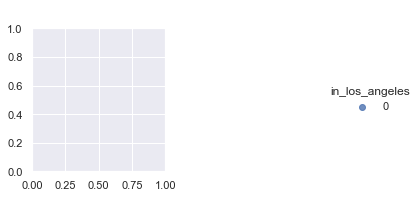

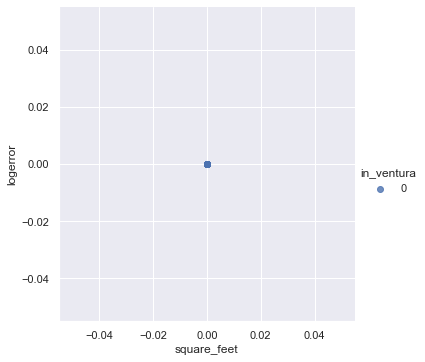

In [93]:
plt.subplots(2, 2, figsize=(16,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.lmplot(x='square_feet', y='logerror', hue='in_orange_county', data=train, fit_reg=True)

plt.subplot(2,2,2)
sns.lmplot(x='square_feet', y='logerror', hue='in_los_angeles', data=train, fit_reg=True)

plt.subplot(2,2,3)
sns.lmplot(x='square_feet', y='logerror', hue='in_ventura', data=train, fit_reg=True)

In [ ]:
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='cyan')